# Part 6.2 - Analysis and Visualization
---
### Papers Past Topic Modeling
<br/>

Ben Faulks - bmf43@uclive.ac.nz

Xiandong Cai - xca24@uclive.ac.nz

Yujie Cui - ycu23@uclive.ac.nz

In [1]:
import os, sys, subprocess
sys.path.insert(0, '../utils') # for import customed modules
import pandas as pd

# for ploting
import seaborn as sns
from matplotlib import pyplot as plt
import holoviews as hv
from holoviews import opts
plt.style.use('seaborn-darkgrid')
sns.axes_style("darkgrid")
%matplotlib inline

## 1 General Analysis and Visualization

**In this part we will using the full dataset for analysis and visualiztion to find features in the dataset.** 

### 1.1 Load dataframes

**Load the the dataframes:**
* topic words list
* dominant topics per document dataframe
* topic average weight per year dataframe

**Topics List:**

In [2]:
path = r'../5-model/model_train/topicKeys.txt'

df_topics = pd.read_table(path, 
                          header=None, 
                          index_col=None, 
                          names = ['topic', 'weight', 'words'],
                          encoding='utf8')

topics_shape = df_topics.shape

print('Shape of dataframe:', topics_shape)
df_topics.sample(5)

Shape of dataframe: (250, 3)


,topic,weight,words
136,136,0.00333,whangarei auckland cameron kamo street bank hi...
41,41,0.00364,guns cartridges powder gun shot ammunition dou...
123,123,0.00677,sale harness horses horse draught farm mr cows...
96,96,0.00404,club played skip bowling play game match tourn...
51,51,0.00921,exhibition art pictures zealand picture photog...


**Dominant topics per document dataframe:**

In [3]:
path = r'./train/domTopics/domTopics.csv'

df_dominant = pd.read_csv(path, 
                          header=None, 
                          index_col=None, 
                          names = ['id', 'region', 'year', 'topic', 'weight', 'keywords'],
                          encoding='utf8')

print('Shape of dataframe:', df_dominant.shape)
df_dominant.sample(5)

Shape of dataframe: (160140, 6)


,id,region,year,topic,weight,keywords
33399,7261902,Otago,1883,156,0.403621,ewes cows fat sale tooth year heifers steers l...
73679,15143577,Gisborne,1912,94,0.236703,bill house mr amendment committee council gove...
50179,10551978,Otago,1891,76,0.746546,dam season horse bred imported mares sire mare...
12308,3694092,West Coast,1894,244,0.489310,lid yard price gd pair white ladies worth men ...
49146,10313602,Waikato,1893,3,0.338157,man people men public law good fact make thing...


**Topic average weight per year dataframe:**

In [4]:
path = r'./train/avgWeight/avgWeight.csv'

# generate new column names
columns = [str(x) for x in list(range(topics_shape[0]))]
columns.insert(0, 'year')

df_avgweight = pd.read_csv(path, 
                           header=None, 
                           index_col=None, 
                           names = columns,
                           encoding='utf8')

print('Shape of dataframe:', df_avgweight.shape)
df_avgweight.sample(5)

Shape of dataframe: (103, 251)


,year,0,1,2,3,4,5,6,7,8,...,240,241,242,243,244,245,246,247,248,249
1887,0.001563,0.003859,0.005502,0.013596,0.001016,0.011788,0.003395,0.005270,0.011564,0.007406,...,0.001758,0.008172,0.001469,0.003644,0.004803,0.005084,0.001672,0.003355,0.004898,0.406865
1900,0.002267,0.001960,0.001542,0.009642,0.000734,0.010951,0.002817,0.002836,0.010555,0.004664,...,0.001515,0.003959,0.001309,0.003642,0.004463,0.004563,0.001247,0.002217,0.002443,0.400457
1875,0.000575,0.001985,0.009330,0.017854,0.000939,0.008793,0.001034,0.015154,0.003785,0.005428,...,0.004281,0.001036,0.000290,0.003474,0.003234,0.002694,0.006027,0.010530,0.001416,0.381254
1929,0.008042,0.004670,0.000952,0.006571,0.001905,0.016932,0.000617,0.001318,0.002017,0.006469,...,0.003609,0.003752,0.001011,0.002086,0.005973,0.002943,0.000617,0.001525,0.003379,0.418412
1886,0.000897,0.005516,0.004332,0.012565,0.001233,0.010361,0.004072,0.006075,0.010379,0.006900,...,0.002905,0.008146,0.001747,0.004257,0.004493,0.006222,0.001587,0.003217,0.004255,0.403891


### 1.2 First 10 Topics

**MALLET output the topics keywords list, here we plot first 10 topics in the list. We use scatter plot and bar chart to see the distribution of topics. We can find that the distribution is vary follow the year.**

**Show first 10 topics and the number of its dominant topics:**

In [5]:
# show first 10 topics, keywords and count number
def show_topics10(df):
    print(df.groupby(['topic', 'keywords']).size().reset_index(name='count').sort_values('topic', ascending=True)[:10])

show_topics10(df_dominant)

   topic                                           keywords  count
0      0  mr party government minister labour sir ward j...    665
1      1  bank cent loan zealand london banks money exch...    628
2      2  company apply freight steam passage zealand pa...    534
3      3  man people men public law good fact make thing...   1668
4      4  fruit apples pears case potatoes plums peaches...    124
5      5  good time year made week great work present da...   1016
6      6  napier hastings bay hawke waipawa dannevirke w...     62
7      7  hotel proprietor accommodation spirits wines p...    948
8      8  st handicap time won meeting dividend bst mile...   1121
9      9  young man father lady wife years woman life gi...    757


**Filter the dataframe of first 10 topics:**

In [6]:
# get and print dataframe to visualize
def filter_topics10(df):
    return (df[df['topic'].isin(range(10))].sort_values(by='topic', ascending=True))

df_topics10 = filter_topics10(df_dominant)

print('Shape of dataframe:', df_topics10.shape)
df_topics10.sample(5)

Shape of dataframe: (7523, 6)


,id,region,year,topic,weight,keywords
46993,9789775,Taranaki,1890,8,0.286568,st handicap time won meeting dividend bst mile...
25570,5847171,Otago,1877,8,0.745479,st handicap time won meeting dividend bst mile...
111776,23595967,Manawatu-Wanganui,1912,0,0.419639,mr party government minister labour sir ward j...
105442,19548133,Wellington,1872,3,0.123595,man people men public law good fact make thing...
150393,29015357,Hawke's Bay,1889,6,0.164649,napier hastings bay hawke waipawa dannevirke w...


**Scatter Plot:**

In [7]:
def plot_scatter(df, adjust_top=0.96, title=''):
    g = sns.catplot(x="year", y='weight', hue="topic", col='keywords', col_wrap=2, 
                kind='strip', height=5, aspect=2, jitter=1, dodge=False, s=6, legend=False,
                data=df)
    g.fig.subplots_adjust(top=adjust_top)
    g.fig.suptitle("Scatter Plot of {}".format(title), fontsize=16)
    g.set_xticklabels(rotation=90)
    return g

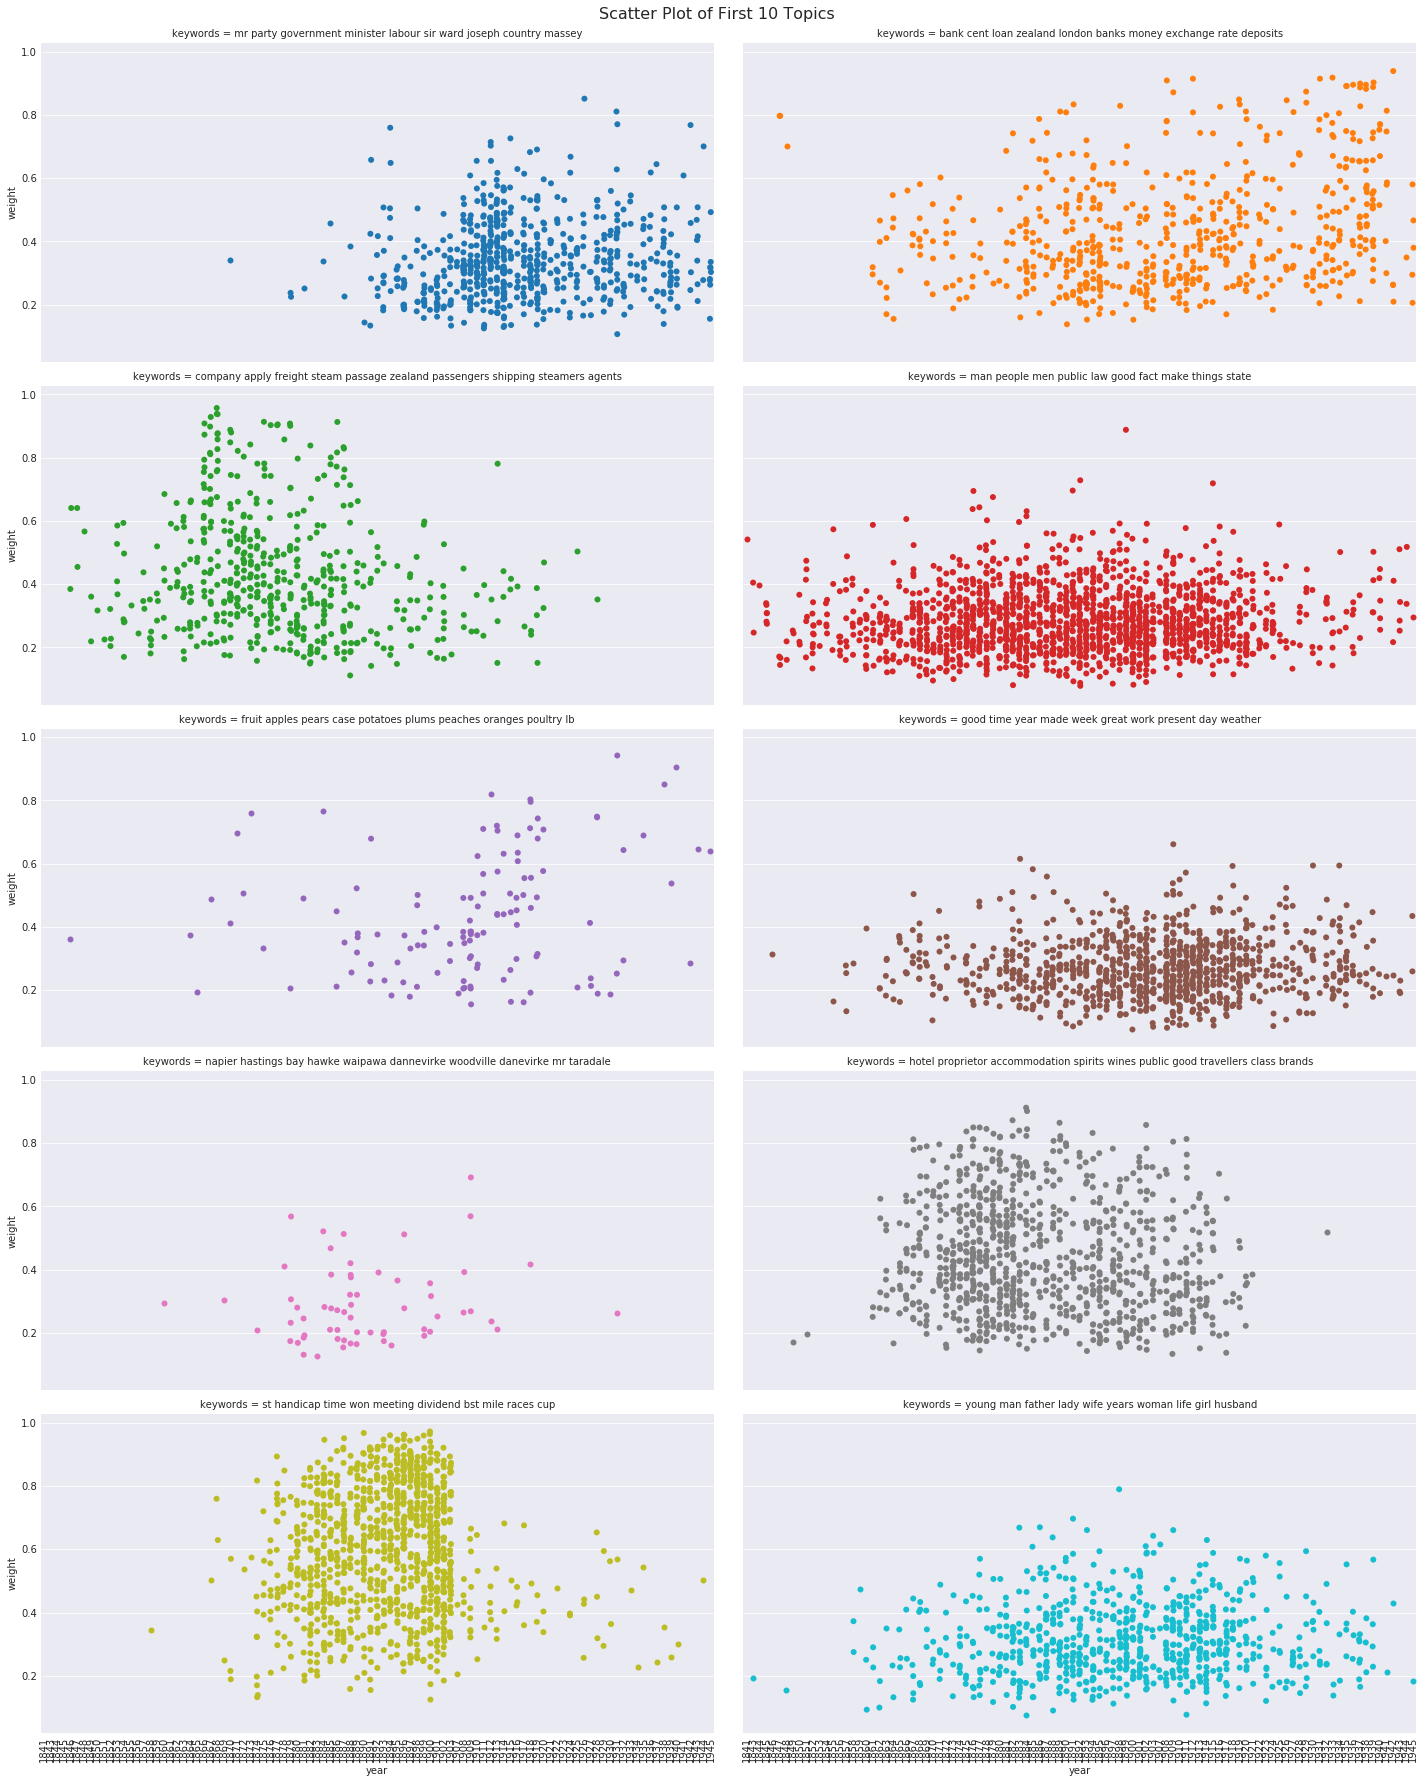

In [8]:
plot_scatter(df_topics10, title='First 10 Topics')